## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [11]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

tickers = ['BP','F','XOM','LNC','AAPL']
data = pd.DataFrame()
for i in tickers:
    data[i] = wb.DataReader(i,data_source='yahoo',start='2000-1-1')['Adj Close']

### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

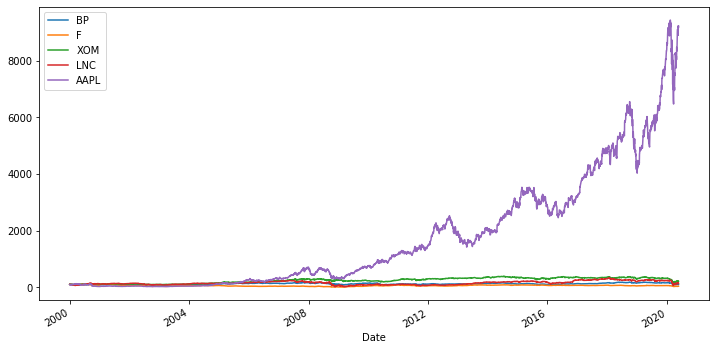

In [17]:
((data/data.iloc[0])*100).plot(figsize=(12,6))

In [9]:
data.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,100.000000,100.000000,100.000000,100.000000,100.000000
2000-01-04,99.468666,96.658720,98.084598,97.119974,91.568962
2000-01-05,102.869313,97.016714,103.431746,93.760008,92.909004
2000-01-06,103.081840,97.136082,108.778930,95.475979,84.868793
2000-01-07,101.168964,104.295923,108.459714,97.895131,88.888871


How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [18]:
returns = (data/data.shift(1))-1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.005313,-0.033413,-0.019154,-0.028800,-0.084310
2000-01-05,0.034188,0.003704,0.054516,-0.034596,0.014634
2000-01-06,0.002066,0.001230,0.051698,0.018302,-0.086539
2000-01-07,-0.018557,0.073709,-0.002935,0.025338,0.047368


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [20]:
weights = np.array([0.2,0.2,0.2,0.2,0.2])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [21]:
annual_return = returns.mean()*250

In [22]:
np.dot(annual_return,weights)

0.12361290730311093

Transform the result into a percentage form. 

In [26]:
str(round(np.dot(annual_return,weights)*100,2)) + '%'

'12.36%'

Is the return of this portfolio satisfactory?